# Метод на най-малките квадрати - допълнителни задачи 

### Задача 1

Моделите на популационната динамика са важен инструмент в изучаването на редица процеси в биологията, медицината, инженерството и др. 
Един много важен математически модел в областта е т. нар. модел на Monod, който описва растежа на дадена популация микроорганизми чрез следното експериментално установено уравнение:

(1) $$ k = k_{max} \frac{S}{K + S}, $$

където\
$k$ се нарича специфична скорост на растеж;\
$k_{max}$ e максималната възможна скорост на растеж за дадения микроорганизъм; \
$S$ e концентрацията на т.нар. лимитиращ субстрат (концентрация на хранителните вещества, намиращи се в реактора,в който се отглежда съответната култура); \
$K$ - константа на насищане - това е стойността на $S$, при която $k/k_{max} = 0.5$.

Стойностите на параметрите $k_{max}$ и $K$ са специфични за отделните видове микроорганизми и зависят от средата, в която те се отглеждат.

В таблицата по-долу са дадени измервания за $k$ и $S$ за популация от Saccharomyces cerevisiae - мая, която се използва в порцеса на ферментация при производството на бира

| S (mg/L) | 7 | 9 | 15 | 25 | 40 | 75 | 100 | 150 |
| --- | --- | --- | --- |--- | --- | --- | ---| --- |
| k (1 / t) | 0.29 | 0.37 | 0.48 | 0.65 | 0.80 | 0.97 | 0.99 | 1.07| 

Като се използват данните от таблицата, да се намерят стойности на параметрите $k_{max}$ и $K$ по метода на най-малките квадрати, като за целта предварително се направи подходяща линеаризация на (1) ( да се направи подходящо преобразование, така че неизвестните параметри да участват линейно във връзката).

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff

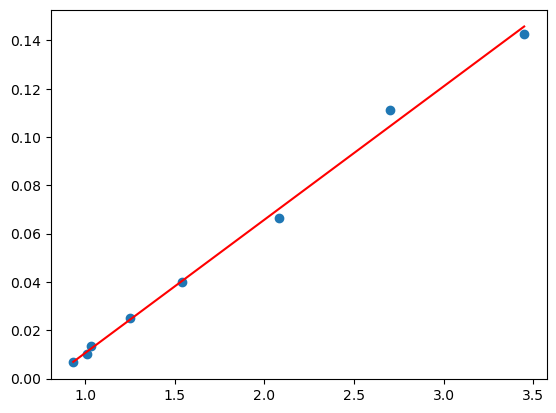

k_max: -22.3724674813354
K: -1.23576989760868


In [21]:
S = np.array([7, 9, 15, 25, 40, 75, 100, 150])
k = np.array([0.29, 0.37, 0.48, 0.65, 0.80, 0.97, 0.99, 1.07])

x = 1 / k
y = 1 / S

a,b = symbols('a, b')

def f(x):
    return a * x + b

phi = 0
for i in range (S.size):
    phi += (f(x[i]) - y[i]) ** 2

sol = solve([Eq(diff(phi,a),0),
             Eq(diff(phi,b),0)])

k_max = 1/sol[b]
K = sol[a] * k_max

def f_sol(x, sol):
    return sol[a]*x + sol[b]

x_axis = np.linspace(min(x), max(x), 1000)
plt.plot(x_axis, f_sol(x_axis, sol), 'red')
plt.scatter(x,y)
plt.show()

print(f"k_max: {k_max}")
print(f"K: {K}")